# MBA em ciencia de dados FM2S
Aluno: Joel Campos Teixeira

In [1]:
#aula 03 - Obter statisticas simples

In [9]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Passo 1 - Obter estatísticas Simples

In [10]:
#carregar os dados
base= pd.read_csv('base_consolidada.csv')
# visualizando as primeiras linhas ou instancias
base.head()

,data,dolar_fechamento,ano,mes,ifix_fech,embi_brazil,fii_gt,fundos_imob_gt,ifix_gt,incc,qtd_invest,ipca_mes,ipca_3_meses,ipca_6_meses,ipca_ano,ipca_12_meses,pib_per_capta_usd,selic_meta,grupo
0,2011-01,1.6096,2011,1,1001.11,179,7,1.0,0.0,455.619,36000.0,0.83,2.31,3.58,0.83,5.99,13245.3874,10.75,A
1,2011-02,1.6169,2011,2,1002.03,177,9,1.0,0.0,456.917,36000.0,0.80,2.28,4.37,1.64,6.01,13245.3874,11.25,C
2,2011-03,1.6574,2011,3,1002.86,173,6,2.0,0.0,458.887,36000.0,0.79,2.44,4.72,2.44,6.30,13245.3874,11.25,A
3,2011-04,1.6228,2011,4,1036.93,169,7,1.0,0.0,463.766,36000.0,0.77,2.38,4.74,3.23,6.51,13245.3874,11.75,C
4,2011-05,1.5712,2011,5,1048.61,175,7,3.0,0.0,477.405,36000.0,0.47,2.04,4.37,3.71,6.55,13245.3874,12.00,C


In [11]:
#renomear a coluna nessária para calcular 
base.rename(columns={'ifix_fech':'preco_fundo_imobiliario'},inplace=True)


In [12]:
# modo de verificar estatisticas simples com describe
base.describe()

,dolar_fechamento,ano,mes,preco_fundo_imobiliario,embi_brazil,fii_gt,fundos_imob_gt,ifix_gt,incc,qtd_invest,ipca_mes,ipca_3_meses,ipca_6_meses,ipca_ano,ipca_12_meses,pib_per_capta_usd,selic_meta
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,135.000000,1.320000e+02,135.000000,135.000000,135.000000,135.000000,135.000000,132.000000,136.000000
mean,3.342315,2016.176471,6.382353,1919.351544,271.367647,31.132353,5.985294,4.702206,675.437889,3.820000e+05,0.506519,1.512963,3.035333,3.236519,5.990963,9966.081246,8.897059
std,1.234353,3.288324,3.485544,621.796711,74.681031,26.228570,6.376735,7.682683,135.721370,4.953701e+05,0.361137,0.878560,1.506500,2.268173,2.385979,2106.858989,3.609846
min,1.544000,2011.000000,1.000000,1001.110000,142.000000,6.000000,0.500000,0.000000,455.619000,3.600000e+04,-0.380000,-0.620000,0.100000,-0.160000,1.880000,6796.844540,2.000000
25%,2.230200,2013.000000,3.000000,1398.392500,224.000000,12.000000,2.000000,0.000000,563.221000,8.900000e+04,0.250000,0.805000,1.915000,1.425000,4.190000,8710.063290,6.500000
50%,3.245750,2016.000000,6.000000,1747.755000,260.000000,16.500000,3.000000,0.500000,681.756000,1.020000e+05,0.460000,1.490000,2.700000,2.880000,5.990000,9151.381730,9.000000
75%,4.013275,2019.000000,9.000000,2517.010000,315.750000,55.250000,10.000000,5.000000,758.964500,6.450000e+05,0.760000,2.140000,4.270000,4.470000,7.185000,12300.386700,11.750000
max,5.777400,2022.000000,12.000000,3225.150000,523.000000,100.000000,24.000000,42.000000,981.244000,1.546000e+06,1.620000,3.830000,6.250000,10.670000,11.300000,13245.387400,14.250000


In [13]:
#calcular com o preco_fundo imobiliario
#Estatisticas simples
media = base['preco_fundo_imobiliario'].mean(),
mediana = base['preco_fundo_imobiliario'].median(),
moda= base['preco_fundo_imobiliario'].mode().values[0],
variancia = base['preco_fundo_imobiliario'].var(),
des_padrao =base['preco_fundo_imobiliario'].std()


In [14]:
media, mediana, moda, variancia, des_padrao

((np.float64(1919.351544117647),),
 (np.float64(1747.755),),
 (np.float64(1001.11),),
 (np.float64(386631.1497894499),),
 np.float64(621.7967109831395))

### Passo 2- Analise Exploratoria dos Dados (AED)

Text(0.5, 1.0, 'Distribuição preços imobiliarios')

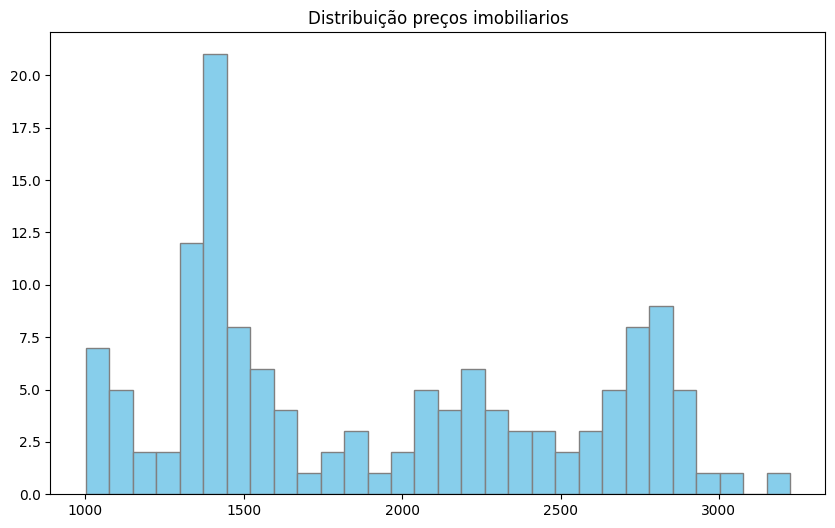

In [15]:
# criar o histograma dos fundos imobiliarios
plt.figure(figsize=(10,6))
plt.hist(base['preco_fundo_imobiliario'],bins=30,color='skyblue',edgecolor='gray')
plt.title('Distribuição preços imobiliarios')


(array([14610., 15340., 16071., 16801., 17532., 18262., 18993.]),
 [Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022')])

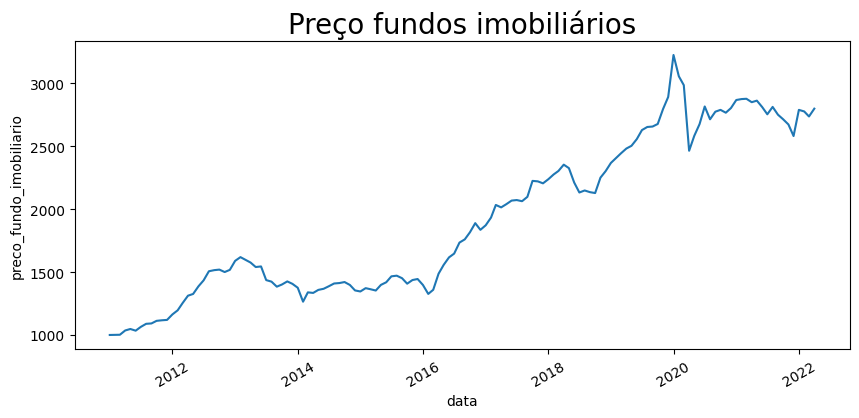

In [19]:
# Criando grafico de tendencias para serie temporal
plt.figure(figsize=(10,4))
base['data'] = pd.to_datetime(base['data'])
sb.lineplot(x=base['data'],y=base['preco_fundo_imobiliario'])
plt.title('Preço fundos imobiliários',fontsize='20')
plt.xticks(rotation=30)

### Passo 3- Aplicar KDE ( Kernel Density Estimation)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000'),
  Text(4500.0, 0, '4500')])

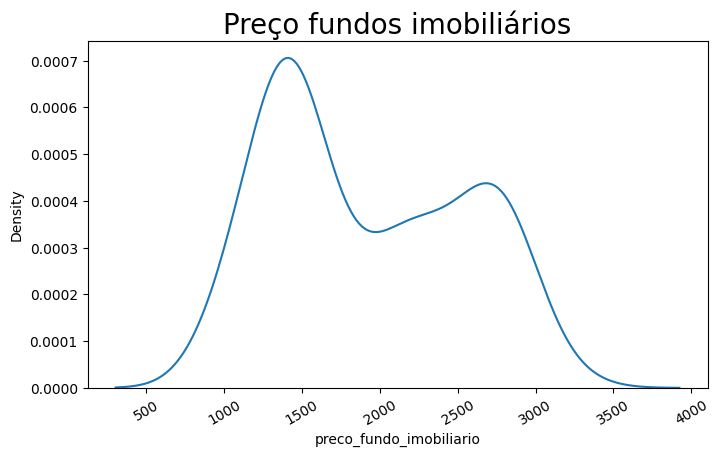

In [22]:
plt.figure(figsize=(8,4.5))  # Criando a figura
sb.kdeplot(base['preco_fundo_imobiliario']) # Criando o grafico
plt.title('Preço fundos imobiliários',fontsize='20') # setando o titulo
plt.xticks(rotation=30)# aplicando rotation na legenda do x label

### Passo 4 Modelar as Estatísticas com Statsmodels

Text(0.5, 1.0, 'Séries Temporais de Preço de Fundo Imobiliário x Dolar')

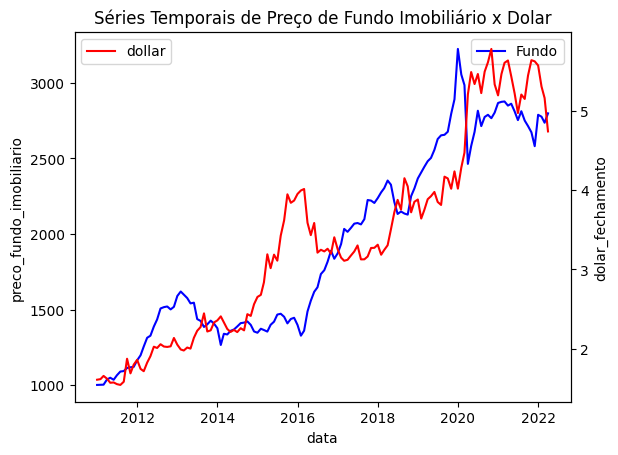

In [43]:
# aqui comparamos a tendencia do preço dos fundos com o preço do dollar
# verificamos sua importancia e dependencia 

figure,ax = plt.subplots(1,1)
ax2= ax.twinx()
sb.lineplot(data=base,x='data',y='preco_fundo_imobiliario',ax=ax,color='blue',label ='Fundo')
sb.lineplot (data=base,x='data',y='dolar_fechamento',ax=ax2,color='red',label='dollar')
plt.title('Séries Temporais de Preço de Fundo Imobiliário x Dolar')


<Axes: xlabel='data', ylabel='dolar_fechamento'>

In [45]:
# Regressão Linear Simples com stats Model
x= base['dolar_fechamento'] # Associando a variavel independente
y = base['preco_fundo_imobiliario']
X = sm.add_constant(x)  # adicionando a constante
modelo =sm.OLS(y,X).fit() # aplicando a Ordinary Least Squares
print(modelo.summary())  # requerendo o sumário


                               OLS Regression Results                              
Dep. Variable:     preco_fundo_imobiliario   R-squared:                       0.751
Model:                                 OLS   Adj. R-squared:                  0.749
Method:                      Least Squares   F-statistic:                     404.3
Date:                     Tue, 10 Dec 2024   Prob (F-statistic):           2.74e-42
Time:                             19:36:08   Log-Likelihood:                -972.76
No. Observations:                      136   AIC:                             1950.
Df Residuals:                          134   BIC:                             1955.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

### Passo 5 - Diagnosticar e Validar os modelos

Text(0.5, 1.0, 'Distribuição dos resíduos')

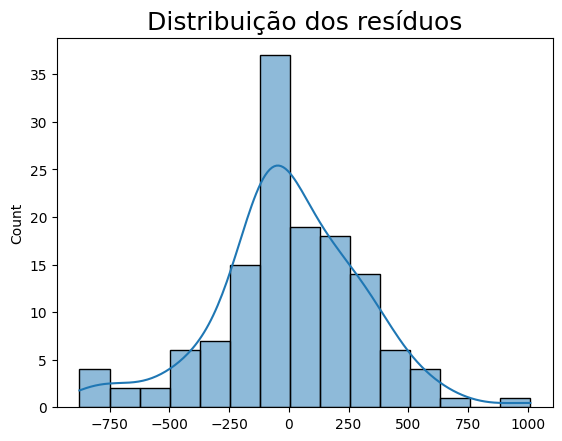

In [47]:
# Analisar os residuos
residuo = modelo.resid # recuperando os residuos do modelo
sb.histplot(residuo,kde=True) # Criando a distribuição dos residuoa
plt.title('Distribuição dos resíduos',fontsize=18)


Text(0, 0.5, 'Residuos')

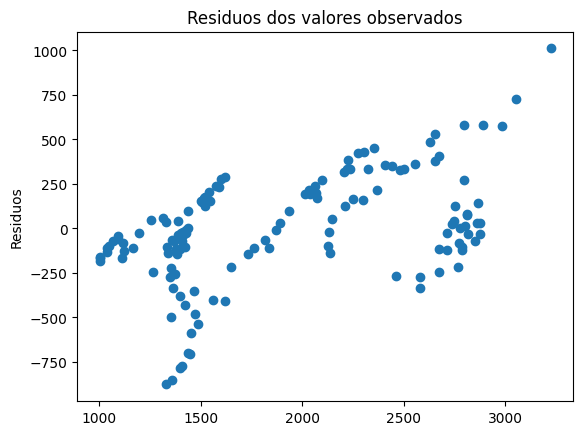

In [49]:
# plto dos residuos
plt.scatter(y,residuo)
plt.title('Residuos dos valores observados')
plt.ylabel('Residuos')

Text(0.5, 1.0, 'Serie Temporal de Preço Fundo x Dolar')

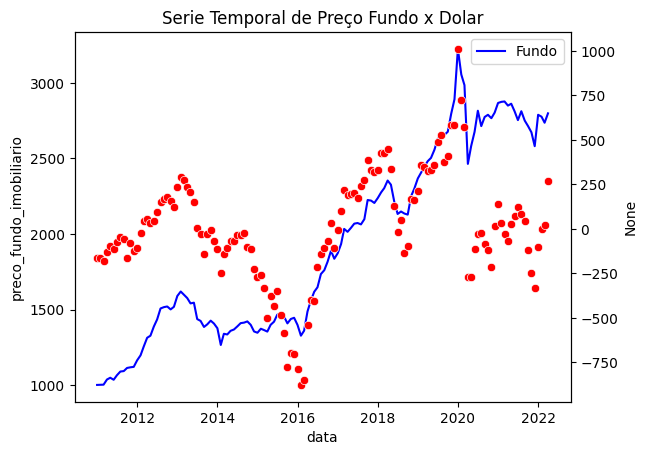

In [51]:
# aqui comparamos os  residuos com o preço do fundo imobiliario

figure,ax = plt.subplots(1,1)
ax2= ax.twinx() 
sb.lineplot(data=base,x='data',y='preco_fundo_imobiliario',ax=ax,color='blue',label ='Fundo')
sb.scatterplot(data=base,x='data',y= residuo, ax=ax2,color='red')
plt.title('Serie Temporal de Preço Fundo x Dolar')

### Passo 6 - Construir modelos avançados com statsmodels e Scipy

In [52]:
# Criaremos o modelo ARIMA (Auto Regreted Integrate Moved Averange
arima=ARIMA(base['preco_fundo_imobiliario'],
           order=(1,1,1),
           enforce_stationarity=False,
           enforce_invertibility=False
           ).fit()
print(arima.summary())

                                  SARIMAX Results                                  
Dep. Variable:     preco_fundo_imobiliario   No. Observations:                  136
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -766.877
Date:                     Tue, 10 Dec 2024   AIC                           1539.755
Time:                             19:56:06   BIC                           1548.426
Sample:                                  0   HQIC                          1543.278
                                     - 136                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8831      0.250     -3.536      0.000      -1.373      -0.394
ma.L1          0.8155      0.293      2.785      0.005       0.242       1.389
sigma2      

## Passo 7 - Analise de covariancia e teste AB

In [54]:
# teste t para comparar dois grupos de investidores no fundo
grupo1= base[base['grupo']=='A']['preco_fundo_imobiliario'] # agrupando A da base
grupo2= base[base['grupo']=='B']['preco_fundo_imobiliario'] # agrupando B da base
t_stat,p_value = stats.ttest_ind(grupo1,grupo2) # chamando o metodo para a analise
print(f'Tstatistics:{t_stat}, P_value:{p_value}')

# abaixo veremos que os dois grupos possuem m

Tstatistics:1.1623223267180811, P_value:0.2492281391470874


## Passo 8 - Identificar avaliação de colinearidade

In [55]:
# matriz de correlação para as faviaveis financeiras 

<Axes: >

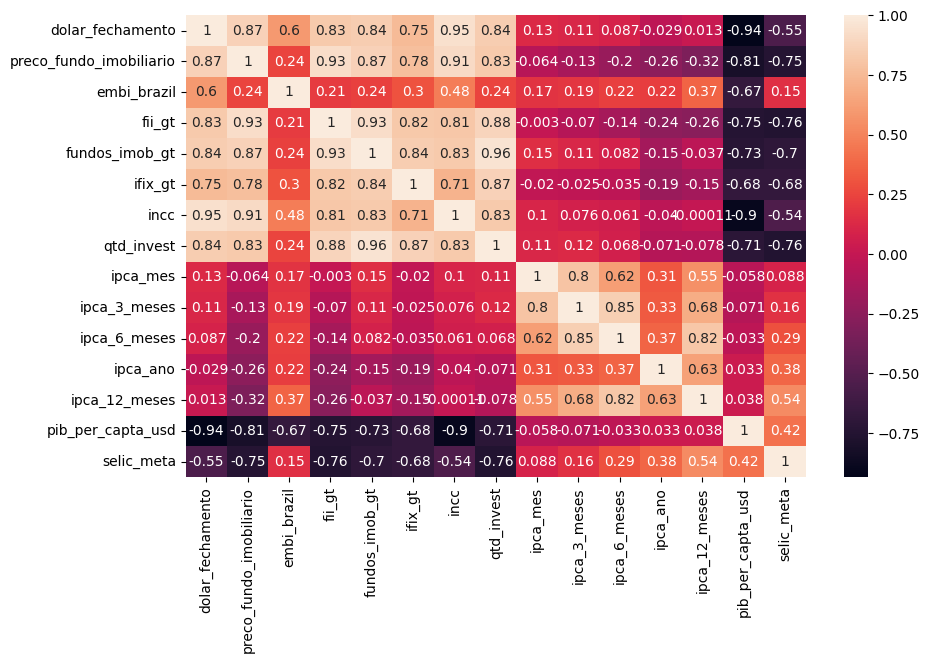

In [57]:
plt.figure(figsize=(10,6))
correl= base.drop(columns=['data','ano','mes','grupo']).corr()
sb.heatmap(correl,annot=True)


In [58]:
base.columns

Index(['data', 'dolar_fechamento', 'ano', 'mes', 'preco_fundo_imobiliario',
       'embi_brazil', 'fii_gt', 'fundos_imob_gt', 'ifix_gt', 'incc',
       'qtd_invest', 'ipca_mes', 'ipca_3_meses', 'ipca_6_meses', 'ipca_ano',
       'ipca_12_meses', 'pib_per_capta_usd', 'selic_meta', 'grupo'],
      dtype='object')

In [61]:
# calcular o VIF para verificar a colinearidade
x= base[['qtd_invest','ipca_mes','pib_per_capta_usd']].dropna()
vif_data=pd.DataFrame()
vif_data['VIF']=[variance_inflation_factor(x.values,1) for i in range(x.shape[1])]
vif_data['variable']= x.columns
vif_data

,VIF,variable
0,2.990135,qtd_invest
1,2.990135,ipca_mes
2,2.990135,pib_per_capta_usd
